### Make necessary Imports

In [1]:
import docx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
from copy import deepcopy

### Read given doc file into an Numpy array

In [2]:
doc = docx.Document("Microchip_quality.docx")
data = []
for para in doc.paragraphs:
    tmp = para.text.split(",")
    data.append(tmp)
data = data[1: len(data) - 1]

for i in range(len(data)) :
    for j in range(len(data[0])) :
        data[i][j] = float(data[i][j])
data = np.array(data)


### Add the bias feature and mean normalize the data. Also shuffle the data for randon distribution of classes. 

In [3]:
X = data[ : , : -1]
# Add bias feature
bias = np.ones((X.shape[0], 1))
X = np.hstack((bias, X))

# Mean Normalization
mean = np.mean(X, axis=0)
s_dev = np.std(X, axis=0)
for i in range(1, X.shape[1]) :
    for j in range(X.shape[0]) :
        X[j][i] = X[j][i] - mean[i]
        X[j][i] = X[j][i] / s_dev[i]
    
Y = data[ : , -1]
from sklearn.utils import shuffle
X, Y = shuffle(X, Y)

### Split entire dataset in 70:30 ratio for training and testing purposes respectively

In [4]:
# Split into training and testing data
sz = int((X.shape[0] * 7) / 10)

X_train, X_test, Y_train, Y_test = X[:sz], X[sz:], Y[:sz], Y[sz:]

In [5]:
print(X_train.shape)
print(Y_test.shape)

(82, 3)
(36,)


### Initialize hyperparameters. Also change the same to further tune the results.

In [6]:
# Initialize parameters
lambda_reg = 0.1
theta =  np.random.uniform(-1, 1, X.shape[1])
alpha = 0.05
iters = 100000

### Define sigmoid, cost and gradient descent functions. Regularization is used.

In [7]:
# Sigmoid Function
def sigmoid(x) :
    return 1.0 / (1.0 + np.exp(-x))

# Cost Function
def cost_function(X, Y, theta, lambda_reg) :
    tmp = np.dot(np.transpose(Y), np.log(sigmoid(np.dot(X, theta)))) + np.dot(np.transpose(1.0 - Y), np.log(1.0 - sigmoid(np.dot(X, theta))))
    return (-1.0 / X.shape[0]) * (tmp) + (lambda_reg / (2.0 * X.shape[0])) * (sum(np.square(theta[:])))

# Gradient Descent
def gradient_descent(X, Y, theta, alpha, lambda_reg, max_iters) :
    costs = []    
    iters=0
    while(iters<=max_iters) :
        iters=iters+1
        tmp = np.dot(np.transpose(X), (sigmoid(np.dot(X, theta)) - Y))
        reg_term = np.zeros(theta.shape)
        reg_term[1 : ] = lambda_reg * theta[1 : ]
        theta = theta - (alpha/X.shape[0])* (tmp+reg_term)
        new_cost = cost_function(X, Y, theta, lambda_reg)
        costs.append(new_cost)
    return theta, costs, iters

### Applying GD and print final cost and co-efficients

Final error :  0.6892623261847809
Final values of co-efficients are :  [-0.08446324 -0.06169769  0.12595919]


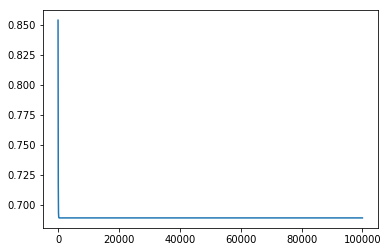

In [8]:
# Apply Gradient Descent on Training data
theta_final, costs, iters = gradient_descent(X_train, Y_train, theta, alpha, lambda_reg, iters)

print('Final error : ', cost_function(X_train, Y_train, theta_final, lambda_reg))
print('Final values of co-efficients are : ', theta_final)

plt.plot(np.arange(iters), costs)

### A scatter plot of testing data

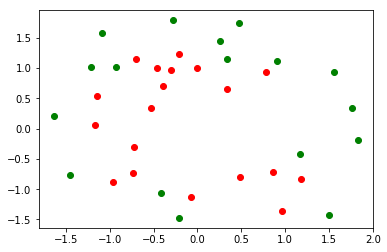

In [9]:
# Scatter plot of testing data
X1_positive = []
X1_negative = []
X2_positive = []
X2_negative = []
for i in range(X_test.shape[0]):
    if(Y_test[i] == 1.0):
        X1_positive.append(X_test[i][1])
        X2_positive.append(X_test[i][2])
    else :
        X1_negative.append(X_test[i][1])
        X2_negative.append(X_test[i][2])

plt.plot(X1_positive, X2_positive, 'ro')
plt.plot(X1_negative, X2_negative, 'go')

### Prediction are made for testing data. Scatter plot of predicted data is made and accuracy is evaluated.

In [10]:
# Evaluate Accuracy
H_predict = sigmoid(np.dot(X_test, theta_final))
Y_predict=[]
for i in range(len(X_test)) :
    if(H_predict[i] > 0.5) :
        Y_predict.append(1)
    elif(H_predict[i] < 0.5) :
        Y_predict.append(0)

print('Accuracy for Test data : ', np.sum(Y_test==Y_predict)/Y_test.shape[0] * 100)

Accuracy for Test data :  44.44444444444444


### Plotting decision boundary

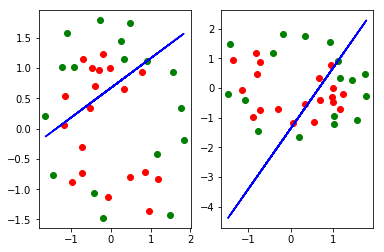

In [11]:
plt.subplot(1,2,1)
X1 = X_test[: , 1]
Y1 = -1.0 * ((theta_final[0] + theta_final[1] * X1) / (theta_final[2]))
plt.plot(X1_positive, X2_positive, 'ro')
plt.plot(X1_negative, X2_negative, 'go')
plt.plot(X1, Y1, 'b')

plt.subplot(1,2,2)
X2 = X_test[: , 2]
Y2 = -1.0 * ((theta_final[0] + theta_final[2] * X2) / (theta_final[1]))
plt.plot(X2_positive, X1_positive, 'ro')
plt.plot(X2_negative, X1_negative, 'go')
plt.plot(X2, Y2, 'b')

### We add new features, namely X1^2, X2^2, X1^3 and X2^3, as we observe the previous model was underfitting the data

Final cost :  0.46888425428355
Final values of co-efficients are :  [-0.0682349  -1.1433977  -0.34158562 -1.27805802 -1.77472167  0.77207108
  1.81546894]


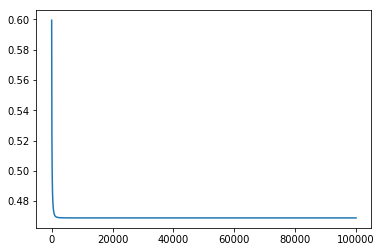

In [87]:
X = data[ : , : -1]
# Add complex features to reduce Under-Fit
X1_2=np.square(X[:,0:1])
X2_2=np.square(X[:,1:2])
X1_3=np.multiply(X1_2,X[:,0:1])
X2_3=np.multiply(X2_2,X[:,1:2])
X = np.hstack((X1_2, X))
X = np.hstack((X2_2, X))
X = np.hstack((X1_3, X))
X = np.hstack((X2_3, X))
# Add bias feature
bias = np.ones((X.shape[0], 1))
X = np.hstack((bias, X))

# Mean Normalization
mean = np.mean(X, axis=0)
s_dev = np.std(X, axis=0)
for i in range(1, X.shape[1]) :
    for j in range(X.shape[0]) :
        X[j][i] = X[j][i] - mean[i]
        X[j][i] = X[j][i] / s_dev[i]
    
Y = data[ : , -1]
from sklearn.utils import shuffle
X, Y = shuffle(X, Y)

# Separate into training and testing data
sz = int((X.shape[0] * 7) / 10) # 70% Train-Test split

X_train, X_test, Y_train, Y_test = X[:sz], X[sz:], Y[:sz], Y[sz:]

# Initialize parameters
lambda_reg = 0.01
theta =  np.random.uniform(-1, 1, X.shape[1])
alpha = 0.05
iters = 100000

# Apply gradient Descent
theta_final, costs, iters = gradient_descent(X_train, Y_train, theta, alpha, lambda_reg, iters)

# final cost, theta values
print('Final cost : ', cost_function(X_train, Y_train, theta_final, lambda_reg))
print('Final values of co-efficients are : ', theta_final)

plt.plot(np.arange(iters), costs)


### Prediction are made for testing data. Scatter plot of predicted data is made and accuracy is evaluated.

Accuracy for Test data :  83.33333333333334


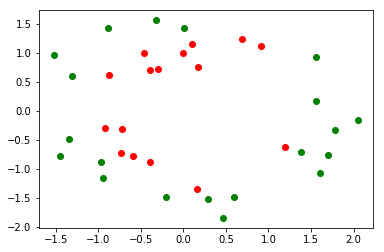

In [88]:
# Evaluate Accuracy
H_predict = sigmoid(np.dot(X_test, theta_final))
Y_predict=[]
for i in range(len(X_test)) :
    if(H_predict[i] > 0.5) :
        Y_predict.append(1)
    elif(H_predict[i] < 0.5) :
        Y_predict.append(0)

X1_positive = []
X1_negative = []
X2_positive = []
X2_negative = []
for i in range(X_test.shape[0]):
    if(Y_predict[i] == 1):
        X1_positive.append(X_test[i][5])
        X2_positive.append(X_test[i][6])
    else :
        X1_negative.append(X_test[i][5])
        X2_negative.append(X_test[i][6])

plt.plot(X1_positive, X2_positive, 'ro')
plt.plot(X1_negative, X2_negative, 'go')

print('Accuracy for Test data : ', np.sum(Y_test==Y_predict)/Y_test.shape[0] * 100)